toy_dataset/toy4_1.npy
(10000, 2) 0.0
noise 8.881784197001252e-16
n 0.0


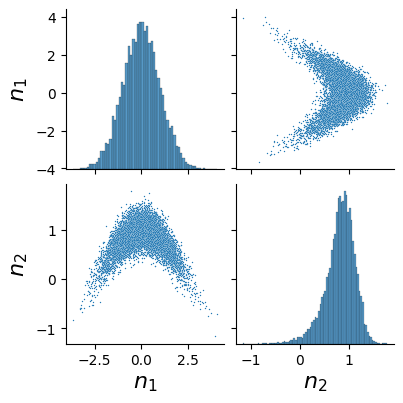

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子
seed=1
np.random.seed(seed)  # 42是一个任意的整数，你可以使用任何整数作为种子

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inv_sigmoid(y):
    return np.log(y/(1-y))

def get_noise(data):
    n2=data[:, 1]
    n1=data[:, 0]
    e2 = (n2-np.sin(np.pi*0.2*(n1+2.5)))*5.0
    return e2

def get_n2(e2, n1):
    n2=np.sin(np.pi*0.2*(n1+2.5))+e2/5.0
    return n2
    
    

def get_toy(n_samples=10000):
    n1=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    e2=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    n2=np.sin(np.pi*0.2*(n1+2.5))+e2/5.0
    data =np.concatenate((n1, n2), axis=1)
    return data, e2
    # return data

data, e2=get_toy()
data_test, e2_test=get_toy()

# name='toy_dataset/toy4_'+str(seed)+'.npy'
# name_test='toy_dataset/toy4_'+str(seed)+'test.npy'
# print(name)
# np.save(name, data)
# np.save(name_test, data_test)

data1=np.load(name)
print(data1.shape, np.abs(data-data1).max())

def abs_max(a, b):
    return np.abs(a-b).max()

e2_p =get_noise(data)
print('noise', abs_max(e2_p, e2.reshape(-1)))
n2=data[:, 1]
n1=data[:, 0]
n2_p = get_n2(e2_p, n1)
print('n', abs_max(n2, n2_p))


# print(data.shape)

def normalize_tensor(tensor):
    # 计算每一列的最大值和最小值
    min_vals = np.min(tensor, axis=0)
    max_vals = np.max(tensor, axis=0)

    # 计算范围
    range_vals = max_vals - min_vals

    # 进行归一化操作
    normalized_tensor = -1 + 2 * (tensor - min_vals) / range_vals

    return normalized_tensor

import pandas as pd
df = pd.DataFrame(data, columns=['$n_1$', '$n_2$']) #,
# normalize_tensor(data_test)
# 绘制两两变量之间的散点图，调整节点大小
plot_kws = {'s': 1}
g = sns.pairplot(df, diag_kind='hist', height=2, plot_kws=plot_kws)
# 循环遍历子图并设置坐标轴标签的字体大小
label_fontsize=16
for ax in g.axes.flat:
    ax.xaxis.label.set_fontsize(label_fontsize)
    ax.yaxis.label.set_fontsize(label_fontsize)
plt.savefig('paper_pdf/toy2_corr.png')
# 显示图形
plt.show()


